## Acquisition Analytics : Bank Marketing
We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

Data Understanding
Data Cleaning
Data Preparation
Data Modelling
Model Evaluation

### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
loan.shape

(41188, 21)

In [6]:
#Create Unique id for each column
loan['prospectID'] = loan['age'].astype(str)+'_'+loan['job']+'_'+loan['education']

In [7]:
loan[loan.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,prospectID
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,39_blue-collar_basic.6y
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,36_retired_unknown
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,27_technician_professional.course
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,47_technician_high.school
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,32_technician_professional.course
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,55_services_high.school
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,41_technician_professional.course
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,39_admin._university.degree
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no,24_services_high.school
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,35_admin._university.degree


We see that there are duplicates after creating the new unique id column. Hence we shall drop the duplicates.

In [8]:
loan = loan.drop_duplicates()

In [9]:
loan.shape

(41176, 22)

In [10]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'prospectID'],
      dtype='object')

In [11]:
sum(loan.duplicated())

0

In [12]:
loan['response'].value_counts()

no     36537
yes     4639
Name: response, dtype: int64

In [13]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [14]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [15]:
loan['response'].value_counts()

0    36537
1     4639
Name: response, dtype: int64

In [16]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [17]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

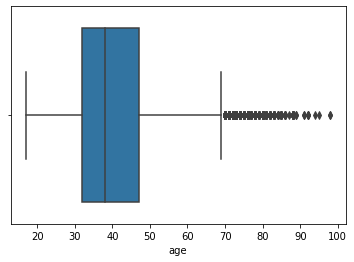

In [18]:
sns.boxplot(x='age', data=loan)
plt.show()

In [19]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

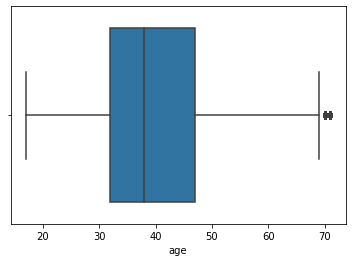

In [20]:
sns.boxplot(x='age', data=loan)
plt.show()

In [21]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [22]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [23]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7241,1067,14.7
2,"(30.0, 40.0]",16380,1597,9.7
3,"(40.0, 50.0]",10237,836,8.2
4,"(50.0, 60.0]",6269,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",421,202,48.0


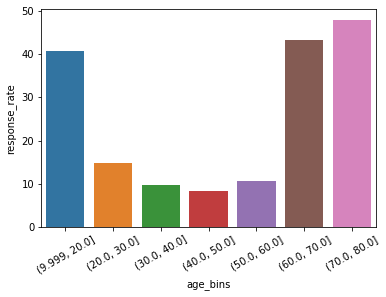

In [24]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [25]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,prospectID,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56_housemaid_basic.4y,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,57_services_high.school,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,37_services_high.school,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,40_admin._basic.6y,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56_services_high.school,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [26]:
loan['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [27]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1351,10419,12.97
1,blue-collar,638,9253,6.90
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1718,25.26
6,self-employed,149,1421,10.49
7,services,323,3967,8.14
8,student,275,875,31.43
9,technician,730,6739,10.83


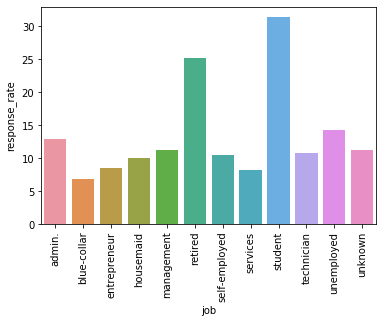

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is reiterated by the above analysis, where we notice that student and retired have the highest response rates.

In [30]:
## We shall replace unknown profession with student, as that is the highest.
loan.replace({'job' : { 'unknown' : 'student'}}, inplace=True)

#### Marital

In [31]:
loan['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [32]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [33]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [34]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4611,10.32
1,married,2543,25001,10.17
2,single,1620,11564,14.01


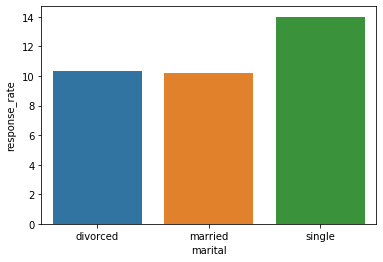

In [35]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [36]:
loan['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [37]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [38]:
loan['education'].value_counts()

Primary_Education      12530
Tertiary_Education     12164
Secondary_Education     9512
professional.course     5240
unknown                 1730
Name: education, dtype: int64

In [39]:
## As there are many cases where the education is unknown, lets replace them with primary education
condition3 = (loan['education'] == 'unknown')
loan = loan.drop(loan[condition3].index, axis = 0, inplace = False)

In [40]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [41]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12530,8.72
1,Secondary_Education,1031,9512,10.84
2,Tertiary_Education,1669,12164,13.72
3,professional.course,595,5240,11.35


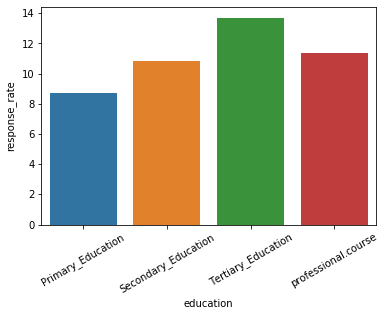

In [42]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [43]:
loan['default'].value_counts()

no         31395
unknown     8048
yes            3
Name: default, dtype: int64

In [44]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [45]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,3976,31395,12.66
1,unknown,412,8048,5.12
2,yes,0,3,0.00


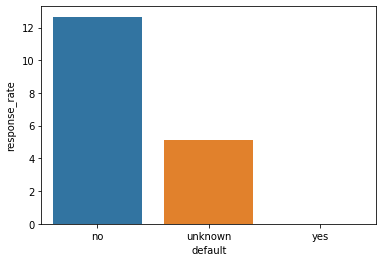

In [46]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [47]:
loan['housing'].value_counts()

yes        20696
no         17800
unknown      950
Name: housing, dtype: int64

In [48]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [49]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,1921,17800,10.79
1,unknown,102,950,10.74
2,yes,2365,20696,11.43


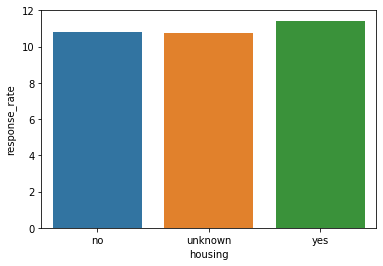

In [50]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [51]:
loan['loan'].value_counts()

no         32490
yes         6006
unknown      950
Name: loan, dtype: int64

In [52]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [53]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3645,32490,11.22
1,unknown,102,950,10.74
2,yes,641,6006,10.67


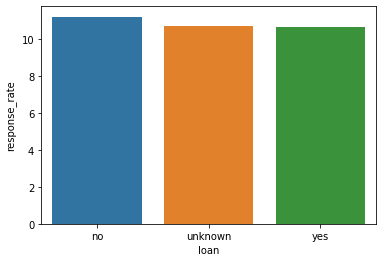

In [54]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Since this is a realistic predictive model, we are discarding the column duration for analysis now.

#### Contact

In [55]:
loan['contact'].value_counts()

cellular     25118
telephone    14328
Name: contact, dtype: int64

In [56]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [57]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3646,25118,14.52
1,telephone,742,14328,5.18


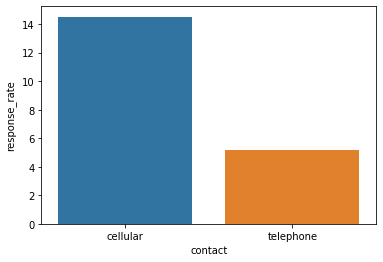

In [58]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [59]:
loan['month'].value_counts()

may    13236
jul     6796
aug     5981
jun     5063
nov     3982
apr     2502
oct      686
sep      519
mar      513
dec      168
Name: month, dtype: int64

In [60]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [61]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,502,2502,20.06
1,aug,620,5981,10.37
2,dec,81,168,48.21
3,jul,612,6796,9.01
4,jun,531,5063,10.49
5,mar,259,513,50.49
6,may,851,13236,6.43
7,nov,391,3982,9.82
8,oct,308,686,44.90
9,sep,233,519,44.89


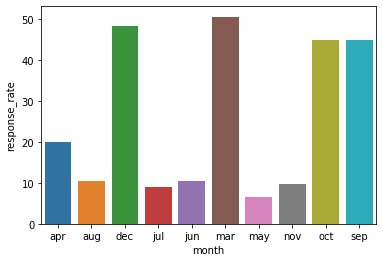

In [62]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [63]:
loan['day_of_week'].value_counts()

thu    8251
mon    8166
wed    7847
tue    7738
fri    7444
Name: day_of_week, dtype: int64

In [64]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [65]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,793,7444,10.65
1,mon,805,8166,9.86
2,thu,995,8251,12.06
3,tue,900,7738,11.63
4,wed,895,7847,11.41


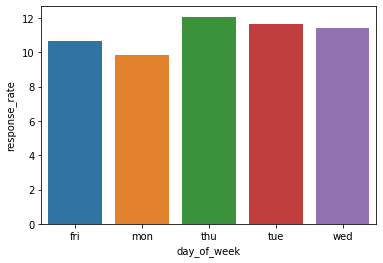

In [66]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

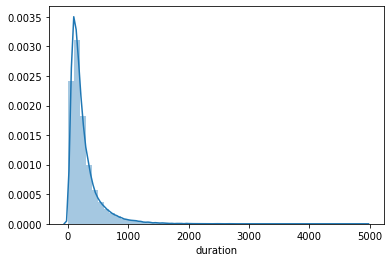

In [67]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [68]:
loan['campaign'].value_counts()

1     16895
2     10128
3      5115
4      2535
5      1538
6       938
7       603
8       383
9       270
10      217
11      167
12      121
13       80
14       67
17       56
15       50
16       47
18       32
20       30
19       23
21       21
22       17
23       16
24       15
27       11
29        9
28        8
30        7
25        7
26        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

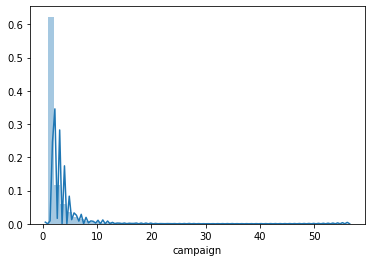

In [69]:
sns.distplot(loan['campaign'])
plt.show()

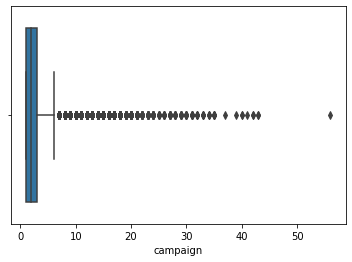

In [70]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [71]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    39446.000000
mean         2.566597
std          2.772420
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [72]:
loan['campaign'][loan['campaign']>14] =14

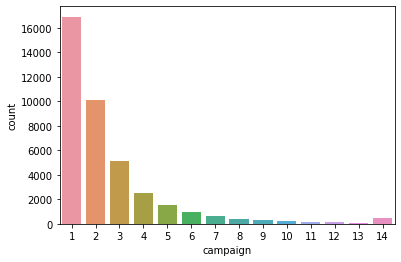

In [73]:
sns.countplot(loan['campaign'])
plt.show()

In [74]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [75]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2167,16895,12.83
1,2,1151,10128,11.36
2,3,546,5115,10.67
3,4,232,2535,9.15
4,5,114,1538,7.41
5,6,74,938,7.89
6,7,36,603,5.97
7,8,16,383,4.18
8,9,16,270,5.93
9,10,12,217,5.53


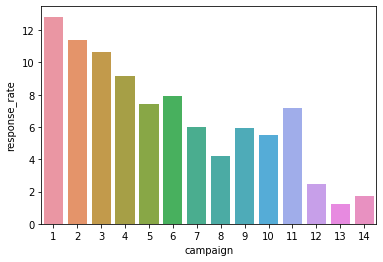

In [76]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [77]:
loan['pdays'].value_counts()

999    38029
3        410
6        390
4        110
2         60
9         57
12        55
7         54
10        48
5         45
13        34
11        27
1         25
15        22
14        18
8         16
0         15
16         9
17         6
18         5
19         3
22         3
21         2
26         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [78]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [79]:
loan['pdays'].value_counts()

First_time_contacted         38029
Contacted_in_first_10days     1230
Contacted_after_10days         187
Name: pdays, dtype: int64

In [80]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [81]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,107,187,57.22
1,Contacted_in_first_10days,788,1230,64.07
2,First_time_contacted,3493,38029,9.19


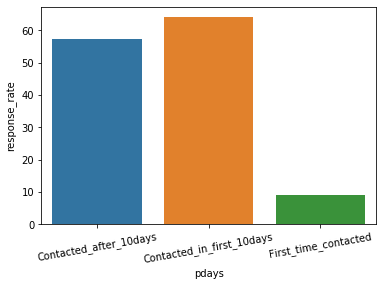

In [82]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [83]:
loan['previous'].value_counts()

0    34091
1     4371
2      700
3      202
4       61
5       16
6        4
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [84]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [85]:
loan['previous'].value_counts()

Never contacted      34091
Less_than_3_times     5273
More than_3_times       82
Name: previous, dtype: int64

In [86]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [87]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1342,5273,25.45
1,More than_3_times,45,82,54.88
2,Never contacted,3001,34091,8.80


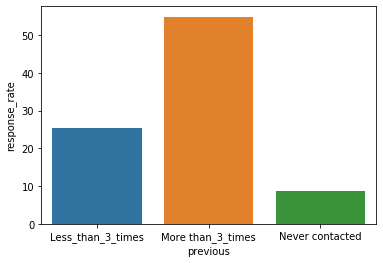

In [88]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [89]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'prospectID',
       'age_bins'],
      dtype='object')

#### Employment Variation Rate

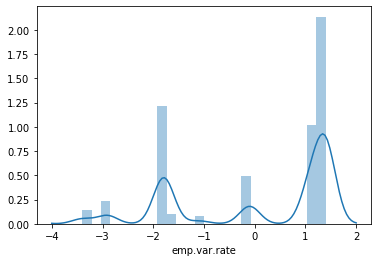

In [90]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [91]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    39446.000000
mean         0.082956
std          1.567300
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [92]:
loan['emp.var.rate'].value_counts()

 1.4    15552
-1.8     8866
 1.1     7385
-0.1     3591
-2.9     1565
-3.4     1003
-1.7      723
-1.1      593
-3.0      158
-0.2       10
Name: emp.var.rate, dtype: int64

In [93]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [94]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,424,1003,42.27
1,-3.0,80,158,50.63
2,-2.9,559,1565,35.72
3,-1.8,1380,8866,15.57
4,-1.7,371,723,51.31
5,-1.1,285,593,48.06
6,-0.2,1,10,10.00
7,-0.1,223,3591,6.21
8,1.1,232,7385,3.14
9,1.4,833,15552,5.36


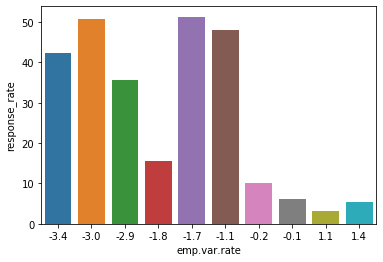

In [95]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

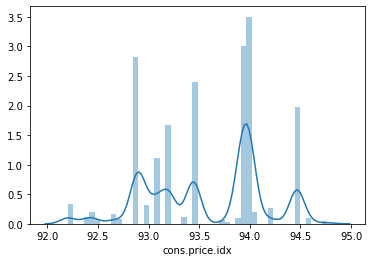

In [96]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [97]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    39446.000000
mean        93.572091
std          0.577238
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [98]:
loan['cons.conf.idx'].value_counts()

-36.4    7385
-42.7    6344
-46.2    5659
-36.1    5050
-41.8    4158
-42.0    3527
-47.1    2350
-31.4     720
-40.8     683
-26.9     426
-30.1     338
-40.3     290
-37.5     280
-50.0     277
-29.8     239
-34.8     236
-39.8     222
-38.3     211
-49.5     196
-40.0     192
-33.6     162
-33.0     158
-34.6     152
-50.8     117
-40.4      64
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

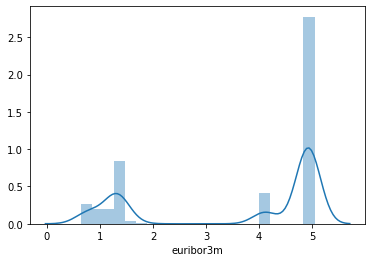

In [99]:
sns.distplot(loan['euribor3m'])
plt.show()

In [100]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    39446.000000
mean         3.623530
std          1.730839
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

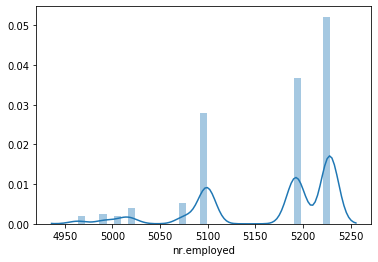

In [101]:
sns.distplot(loan['nr.employed'])
plt.show()

In [102]:
loan['nr.employed'].value_counts()

5228.1    15552
5099.1     8286
5191.0     7385
5195.8     3591
5076.2     1565
5017.5     1003
4991.6      723
4963.6      593
5008.7      580
5023.5      158
5176.3       10
Name: nr.employed, dtype: int64

In [103]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    39446.000000
mean      5167.364896
std         71.804348
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [104]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'prospectID',
       'age_bins'],
      dtype='object')

In [105]:
#Drop rows where poutcome - other
condition = loan.poutcome == 'other'
loan = loan.drop(loan[condition].index, axis = 0, inplace = False)

In [106]:
# Change the unit of 'duration' from seconds to minutes
loan['duration'] = loan['duration'].apply(lambda n:n/60).round(2)

In [107]:
# Drop rows that 'duration' < 5s
condition2 = (loan['duration']<5/60)
loan = loan.drop(loan[condition2].index, axis = 0, inplace = False)

In [108]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)


In [109]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [110]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [111]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [112]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [113]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [114]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [115]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [116]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [117]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [118]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [119]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [120]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [121]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [122]:
# Drop all features for whom dummy variable has been created
loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [123]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,prospectID,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,4.35,1,1.1,93.994,-36.4,4.857,5191.0,0,56_housemaid_basic.4y,...,1,0,0,0,0,1,0,1,1,0
1,57,2.48,1,1.1,93.994,-36.4,4.857,5191.0,0,57_services_high.school,...,1,0,0,0,0,1,0,1,1,0
2,37,3.77,1,1.1,93.994,-36.4,4.857,5191.0,0,37_services_high.school,...,1,0,0,0,0,1,0,1,1,0
3,40,2.52,1,1.1,93.994,-36.4,4.857,5191.0,0,40_admin._basic.6y,...,1,0,0,0,0,1,0,1,1,0
4,56,5.12,1,1.1,93.994,-36.4,4.857,5191.0,0,56_services_high.school,...,1,0,0,0,0,1,0,1,1,0


In [124]:
loan.columns

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'prospectID',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'pdays_Contacted_in_first_10days', 'pdays_First_time_contacted',
       'previous_More than_3_times', 'previous_Never contacted',
       'poutcome_none

In [125]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [126]:
# Putting feature variable to X
X = loan.drop(['response','prospectID','default_unknown','housing_unknown','loan_unknown','poutcome_nonexistent'],axis=1)

# Putting response variable to y
y = loan['response']

In [127]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [128]:
X_train.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_success
14450,37,0.93,4,1.4,93.918,-42.7,4.961,5228.1,0,0,...,0,0,0,1,0,0,1,0,1,0
39042,71,5.85,1,-3.0,92.713,-33.0,0.715,5023.5,0,0,...,0,0,0,1,0,0,1,0,1,0
9459,42,2.90,1,1.4,94.465,-41.8,4.967,5228.1,0,0,...,0,0,0,0,0,0,1,0,1,0
23264,43,2.43,4,1.4,93.444,-36.1,4.964,5228.1,0,0,...,0,0,0,0,1,0,1,0,1,0
24062,42,10.25,1,-0.1,93.798,-40.4,4.760,5195.8,0,0,...,0,0,0,0,0,0,1,0,1,0


In [129]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [130]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [131]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [132]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [133]:
X_train.head()

,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_More than_3_times,previous_Never contacted,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
14450,0.93,0,0,1,0,0,0,0,0,0,...,0,1,0,-0.282207,0.657285,0.840356,0.599897,-0.470606,0.771713,0.846213
39042,5.85,0,0,0,0,1,0,0,0,0,...,0,1,0,3.093825,-0.650881,-1.970128,-1.491453,1.628942,-1.684313,-2.008177
9459,2.90,0,0,0,0,0,0,1,0,0,...,0,1,0,0.214268,-0.650881,0.840356,1.549249,-0.275803,0.775183,0.846213
23264,2.43,0,0,0,0,0,0,0,0,1,...,0,1,0,0.313564,0.657285,0.840356,-0.222758,0.957953,0.773448,0.846213
24062,10.25,0,0,0,1,0,0,0,0,0,...,0,1,0,0.214268,-0.650881,-0.117763,0.391630,0.027225,0.655448,0.395593


In [134]:
# Standardisation continuous features for X_train
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [135]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [136]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [137]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [138]:
X_test.head()

,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_More than_3_times,previous_Never contacted,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32054,5.67,1,0,0,0,0,0,0,0,0,...,0,1,0,-0.969033,-0.656530,-1.196959,-1.167817,-1.222274,-1.322568,-0.953818
2449,14.08,0,0,0,0,0,0,0,0,1,...,0,1,0,0.523539,-0.656530,0.647539,0.731393,0.893596,0.712998,0.327488
15625,1.83,1,0,0,0,0,0,0,0,0,...,0,1,0,-1.765071,1.948505,0.838350,0.600294,-0.466606,0.772986,0.844751
16602,4.32,0,0,0,0,0,0,0,0,1,...,0,1,0,-1.068538,-0.656530,0.838350,0.600294,-0.466606,0.774717,0.844751
20047,2.40,0,0,0,0,0,0,0,0,0,...,0,1,0,0.026015,-0.656530,0.838350,-0.217349,0.958367,0.775870,0.844751


In [139]:
import statsmodels.api as sm

### Modelling- Logistic Regression

Now that the data preparation step is complete, we will jump straight into Logistic Regression modelling

In [140]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [141]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                27575
Model:                            GLM   Df Residuals:                    27529
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5688.9
Date:                Wed, 06 Nov 2019   Deviance:                       11378.
Time:                        22:49:19   Pearson chi2:                 6.84e+07
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.9638      0.329    -12.053      0.000      -4.608      -3.319
duration                            0.2804      0.005     51.476      0.000       0.270       0.291
job_blue-collar                    -0.1752      0.098     -1.786      0.074      -0.367       0.017
job_entrepreneur                   -0.0028      0.153     -0.018      0.985      -0.303       0.297
job_housemaid                       0.0433      0.174      0.248      0.804      -0.299       0.385
job_management                      0.0358      0.104      0.344      0.731      -0.169       0.240
job_retired                         0.3280      0.129      2.542      0.011       0.075       0.581
job_self-employed                   0.0297      0.140      0.212      0.832      -0.244       0.304
job_services                       -0.2343      0.107     -2.196      0.028      -0.444      -0.025
job_student                         0.1746      0.138      1.266      0.205      -0.096       0.445
job_technician                      0.0782      0.087      0.893      0.372      -0.093       0.250
job_unemployed                      0.0105      0.156      0.067      0.946      -0.295       0.316
marital_married                     0.0167      0.084      0.200      0.842      -0.147       0.181
marital_single                     -0.0018      0.096     -0.019      0.985      -0.189       0.186
education_Secondary_Education       0.0547      0.083      0.659      0.510      -0.108       0.217
education_Tertiary_Education        0.1627      0.085      1.921      0.055      -0.003       0.329
education_professional.course       0.0655      0.100      0.656      0.512      -0.130       0.261
default_yes                       -17.3176   1.68e+04     -0.001      0.999    -3.3e+04     3.3e+04
housing_yes                         0.0170      0.050      0.339      0.734      -0.081       0.115
loan_yes                            0.0118      0.069      0.170      0.865      -0.124       0.148
contact_telephone                  -0.6716      0.096     -7.024      0.000      -0.859      -0.484
month_aug                           0.8706      0.150      5.793      0.000       0.576       1.165
month_dec                           0.3235      0.262      1.233      0.218      -0.191       0.838
month_jul                           0.0975      0.120      0.814      0.415      -0.137       0.332
month_jun                          -0.4718      0.155     -3.046      0.002      -0.775      -0.168
month_mar                           2.0428      0.178     11.454      0.000       1.693       2.392
month_may                          -0.4620      0.102     -4.551      0.000      -0.661      -0.263
month_nov                          -0.3834      0.148     -2.593      0.010      -0

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Principal Component Analysis

In [144]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [145]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      63.56
1      75.80
2      79.85
3      83.19
4      86.23
5      88.38
6      89.62
7      90.61
8      91.49
9      92.33
10     93.06
11     93.77
12     94.45
13     95.12
14     95.79
15     96.35
16     96.78
17     97.19
18     97.58
19     97.85
20     98.12
21     98.34
22     98.53
23     98.69
24     98.85
25     99.00
26     99.13
27     99.25
28     99.37
29     99.48
30     99.58
31     99.66
32     99.73
33     99.79
34     99.84
35     99.89
36     99.93
37     99.95
38     99.96
39     99.97
40     99.98
41     99.99
42    100.00
43    100.00
44    100.00
dtype: float64


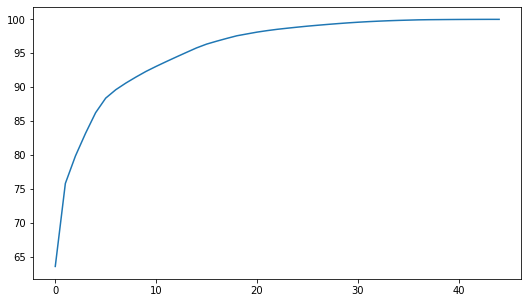

In [146]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [147]:
# create pipeline
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [148]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8522212148685403

In [149]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8939 1534]
 [ 160 1186]]
Sensitivity: 	0.88
Specificity: 	0.85
AUC:    	 0.93


In [150]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.889683
1    0.110317
Name: response, dtype: float64

In [151]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [152]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [153]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.382963,0.013607,0.015623,1.658681e-06,0.1,l1,16,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.927322,0.924288,0.931101,0.936644,0.930051,0.929881,0.004125,2
1,0.381424,0.012404,0.012500,6.250024e-03,0.1,l1,17,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.927307,0.924290,0.930871,0.936639,0.930043,0.929829,0.004112,17
2,0.506536,0.231873,0.012499,6.249380e-03,0.1,l1,18,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.927227,0.924286,0.930881,0.936617,0.929971,0.929796,0.004115,21
3,0.519432,0.126316,0.016870,1.817852e-03,0.1,l1,19,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.927223,0.924239,0.930881,0.936618,0.929977,0.929787,0.004129,29
4,1.128957,1.138062,0.021987,7.505912e-03,0.1,l1,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.927274,0.924221,0.930948,0.936568,0.929973,0.929796,0.004115,20
5,1.248679,0.911637,0.019189,6.108315e-03,0.1,l2,16,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.927322,0.924208,0.931083,0.936751,0.930078,0.929888,0.004181,1
6,0.967447,0.894994,0.048772,4.128258e-02,0.1,l2,17,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.927287,0.924233,0.930771,0.936744,0.930059,0.929818,0.004160,18
7,0.774950,0.571316,0.015624,9.221592e-07,0.1,l2,18,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.927154,0.924233,0.930780,0.936705,0.929916,0.929757,0.004163,36
8,0.513382,0.090415,0.015375,9.486921e-03,0.1,l2,19,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.927159,0.924149,0.930760,0.936683,0.929915,0.929733,0.004176,50
9,1.037744,0.766289,0.021556,1.611065e-02,0.1,l2,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.927163,0.924066,0.930836,0.936563,0.929909,0.929707,0.004162,67


In [154]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.929887908360555
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 16}


In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10473
           1       0.44      0.88      0.58      1346

    accuracy                           0.86     11819
   macro avg       0.71      0.87      0.75     11819
weighted avg       0.92      0.86      0.88     11819



In [156]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8936 1537]
 [ 160 1186]]
Sensitivity: 	0.88
Specificity: 	0.85
AUC:    	 0.93


In [157]:
# Use 'predict' to predict the probabilities on the train set


y_train_pred = res.predict(X_train_sm)
y_train_pred[:10].sort_values(ascending= False)

39042    0.555394
24062    0.442172
29297    0.200111
24675    0.136245
23264    0.018478
9459     0.014405
24820    0.011888
14450    0.010828
11787    0.004888
14135    0.004828
dtype: float64

In [158]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01082812, 0.55539436, 0.01440483, 0.01847797, 0.44217165,
       0.13624468, 0.01188831, 0.20011061, 0.00482753, 0.00488842])

In [159]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.010828
1,1,0.555394
2,0,0.014405
3,0,0.018478
4,1,0.442172


In [160]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.010828,0
1,1,0.555394,1
2,0,0.014405,0
3,0,0.018478,0
4,1,0.442172,0


#### Plotting ROC curve

In [161]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [163]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

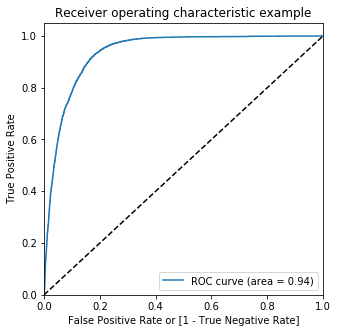

In [164]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.94 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [165]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010828,0,1,0,0,0,0,0,0,0,0,0
1,1,0.555394,1,1,1,1,1,1,1,0,0,0,0
2,0,0.014405,0,1,0,0,0,0,0,0,0,0,0
3,0,0.018478,0,1,0,0,0,0,0,0,0,0,0
4,1,0.442172,0,1,1,1,1,1,0,0,0,0,0


In [166]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.110317  1.000000  0.000000
0.1   0.1  0.850118  0.897765  0.844210
0.2   0.2  0.893817  0.752137  0.911385
0.3   0.3  0.910680  0.621631  0.946521
0.4   0.4  0.912820  0.503616  0.963559
0.5   0.5  0.912167  0.415516  0.973750
0.6   0.6  0.908903  0.325773  0.981209
0.7   0.7  0.905385  0.244576  0.987323
0.8   0.8  0.900780  0.160092  0.992622
0.9   0.9  0.895775  0.085141  0.996291


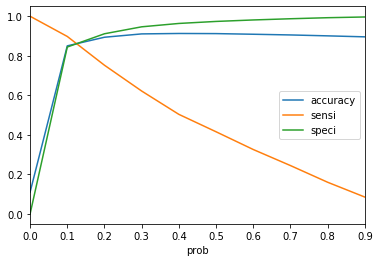

In [167]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.13, you get the optimal values of the three metrics. So let's choose 0.13 as our cutoff now.

In [168]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.13 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.010828,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.555394,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.014405,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.018478,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.442172,0,1,1,1,1,1,0,0,0,0,0,1


In [169]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8681414324569356

In [170]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.929887908360555
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 16}


In [171]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8936 1537]
 [ 160 1186]]
Sensitivity: 	0.88
Specificity: 	0.85
AUC:    	 0.93


#### Create a new data frame

In [172]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [173]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [174]:
decile_df.drop(0, inplace=True, axis = 1)

In [175]:
decile_df.rename({1:'ActualResponse', 2:'PredictedProbabilityResponse'}, axis=1, inplace=True)

In [176]:
decile_df['PredictedResponse'] = decile_df.PredictedProbabilityResponse.map( lambda x: 1 if x > 0.13 else 0)

In [177]:
decile_df['ProspectID'] = range(1, len(decile_df.index)+1)

In [178]:
decile_df['CallDuration']=X_train.duration

In [179]:
#lets assume that the call is one rupee per minute
decile_df['CostofCall'] = decile_df.CallDuration*1

In [180]:
decile_df=decile_df.dropna()

In [181]:
#Sort values in descending order of probability
decile_df.sort_values(by='PredictedProbabilityResponse',ascending=False)

,ActualResponse,PredictedProbabilityResponse,PredictedResponse,ProspectID,CallDuration,CostofCall
11398,1,1.000000,1,11399,2.78,2.78
1315,1,1.000000,1,1316,6.07,6.07
7861,0,1.000000,1,7862,7.73,7.73
11221,1,1.000000,1,11222,0.87,0.87
11278,1,0.999999,1,11279,0.27,0.27
350,0,0.999992,1,351,2.90,2.90
1541,1,0.999988,1,1542,3.33,3.33
9222,1,0.999988,1,9223,2.27,2.27
1756,0,0.999983,1,1757,2.42,2.42
3807,0,0.999981,1,3808,18.80,18.80


In [182]:
decile_df['decile'] = pd.qcut(decile_df['PredictedProbabilityResponse'].rank(method='first'), 10, labels=np.arange(10, 0, -1),duplicates='drop')

#### Lift chart

In [183]:
lift_df = decile_df.groupby('decile')['PredictedProbabilityResponse'].count().reset_index()

In [184]:
lift_df.rename({'PredictedProbabilityResponse':'total'}, axis=1, inplace=True)

In [185]:
lift_df_pred = decile_df[decile_df['ActualResponse']==1].groupby('decile')['ActualResponse'].count().reset_index()

In [186]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [187]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [188]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [189]:
lift_df_final['cumresp'] = lift_df_final['ActualResponse'].cumsum()

In [190]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['ActualResponse']))

In [191]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [192]:
lift_df_final

,decile,total,ActualResponse,cumresp,gain,cumlift
9,1,789,494,494,56.009070,5.600907
8,2,789,238,732,82.993197,4.149660
7,3,789,109,841,95.351474,3.178382
6,4,789,26,867,98.299320,2.457483
5,5,789,7,874,99.092971,1.981859
4,6,789,3,877,99.433107,1.657218
3,7,789,4,881,99.886621,1.426952
2,8,789,1,882,100.000000,1.250000
1,9,789,0,882,100.000000,1.111111
0,10,790,0,882,100.000000,1.000000


Note that you can attain 98% of total conversions by targeting only 40% of the total client base. This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign

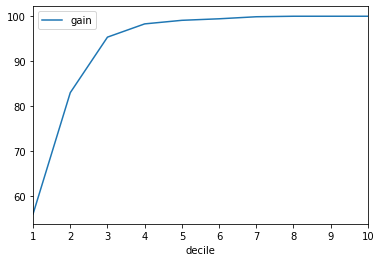

In [193]:
lift_df_final.plot.line(x='decile', y=['gain'])

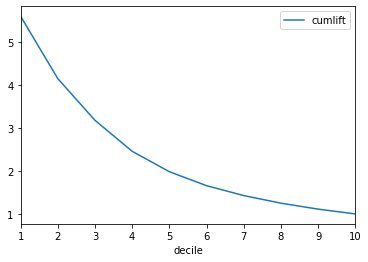

In [194]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

In [195]:
#cost of acquisition
print(decile_df.CostofCall.count())

7891
